In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'ejection_fraction'}>,
        <AxesSubplot:title={'center':'high_blood_pressure'}>,
        <AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>],
       [<AxesSubplot:title={'center':'serum_sodium'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'DEATH_EVENT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

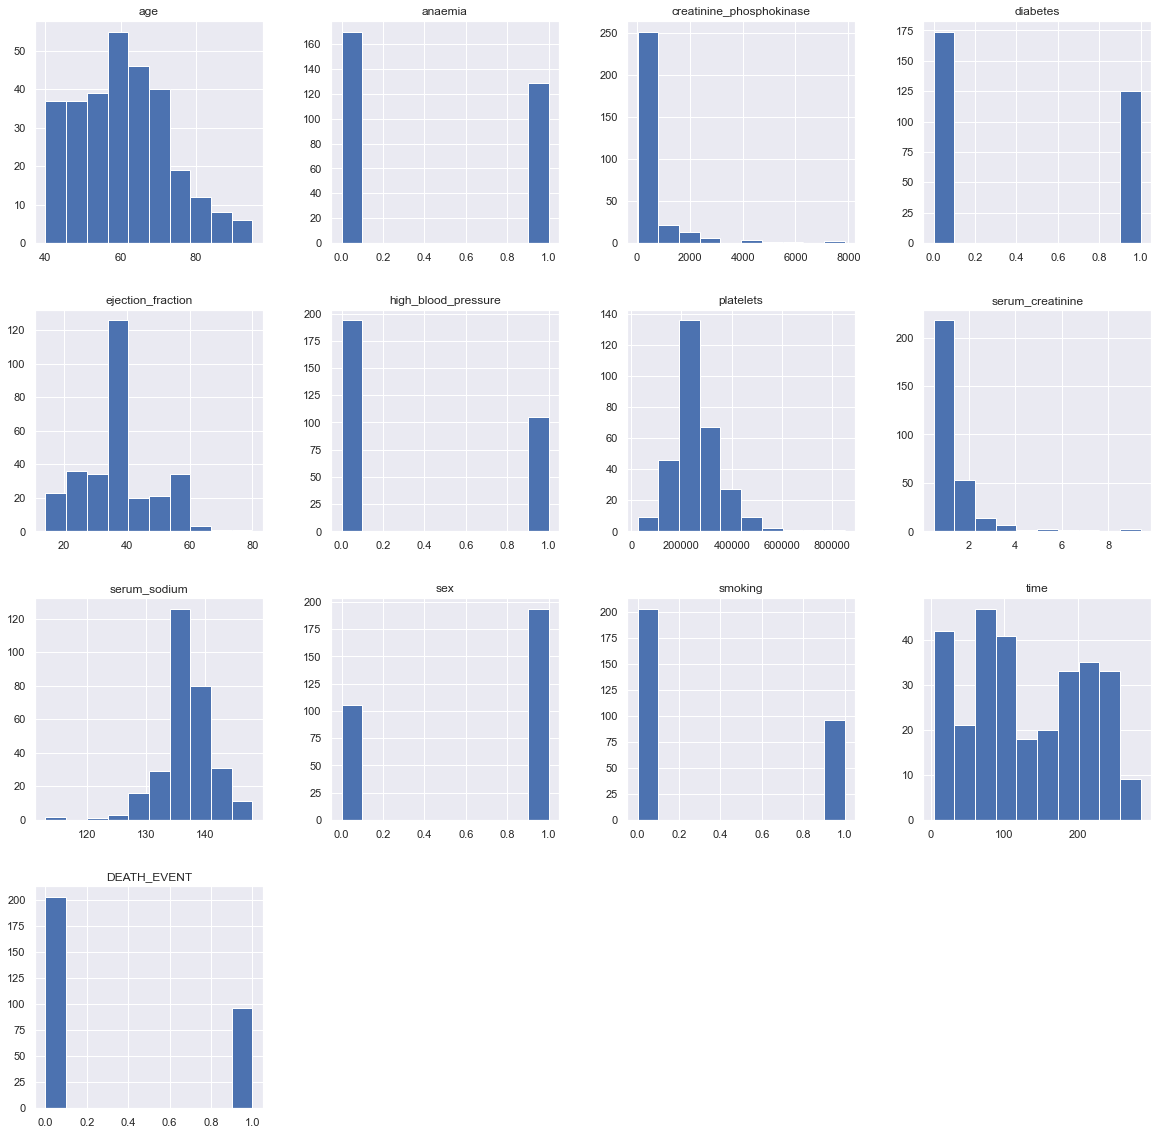

In [4]:
dataset.hist(figsize=(20,20))

In [5]:
dataset.describe(include="all")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [44]:
X = dataset[['ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
y=dataset["DEATH_EVENT"]


(299, 4) (299,)


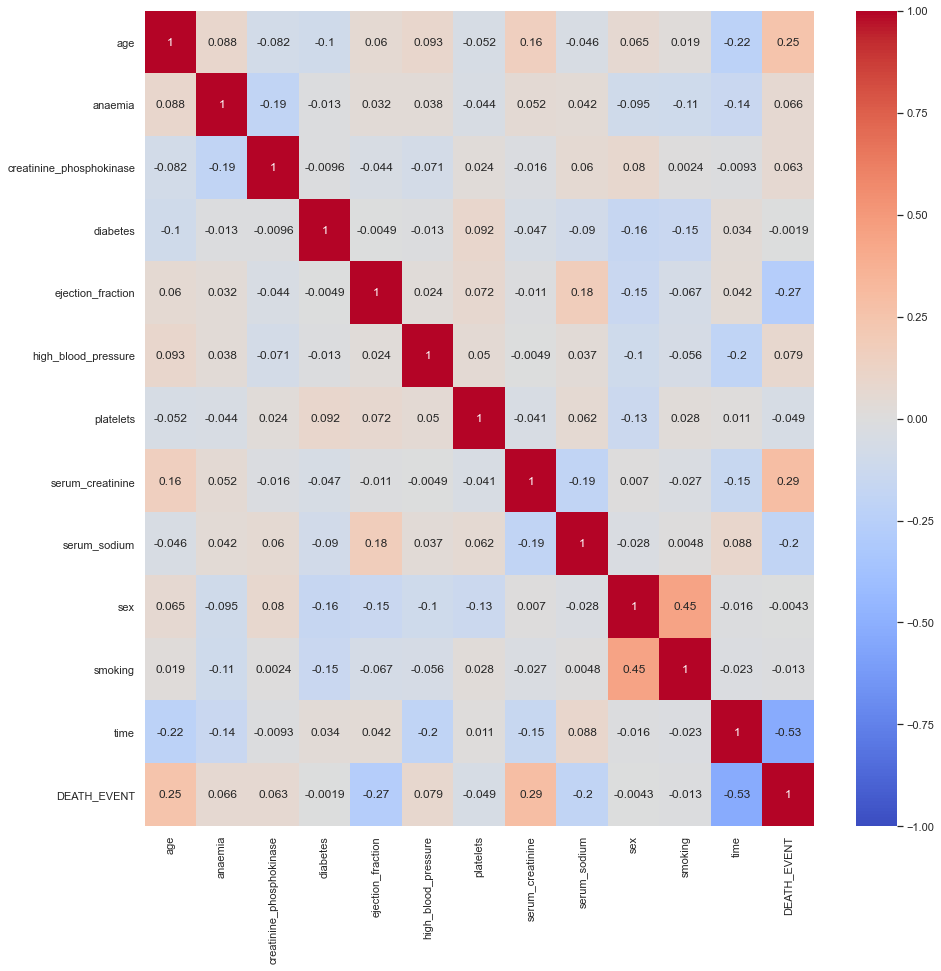

In [13]:
corr = dataset.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [14]:
#Spliting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)

## Using Linear Regression to Predict

In [15]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
y_pred_lin=lr.predict(x_test)


In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [28]:
accuracy_lin=accuracy_score(y_test,y_pred_lin)
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred_lin))
print("Linear Regression Success Rate :", "{:.2f}%".format(100*accuracy_lin))

Confusion Matrix:  [[42  4]
 [ 3 11]]
Linear Regression Success Rate : 88.33%


## Using Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf = RandomForestClassifier(n_estimators=300)

In [20]:
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

In [29]:
accuracy_rf=accuracy_score(y_test,y_pred_rf)
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred_rf))
print("Random Forest Success Rate :", "{:.2f}%".format(100*accuracy_rf))

Confusion Matrix:  [[41  5]
 [ 3 11]]
Random Forest Success Rate : 86.67%


## Using Support Vector Machine

In [37]:
from sklearn.svm import SVC

In [38]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [41]:
y_pred_svm = svm.predict(x_test)

In [42]:
accuracy_svm=accuracy_score(y_test,y_pred_svm)
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred_svm))
print("Random Forest Success Rate :", "{:.2f}%".format(100*accuracy_svm))

Confusion Matrix:  [[45  1]
 [ 5  9]]
Random Forest Success Rate : 90.00%
